Character reationship

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


Term Frequency Inverse Document Frequency

In [3]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

--------------

TF-IDF를 통한 변수선택과 t-SNE를 활용한 시각화

In [20]:
from textblob import TextBlob
#txt = pd.read_csv('essay/collegeEssay01.txt', encoding='utf-8', header= None)

read_data = 'essay/collegeEssay01.txt'
with open(read_data) as files:
    contents = files.read()

blob = TextBlob(contents)
print(blob.noun_phrases)
documents = blob.noun_phrases
#documents = [' '.join(i[0].split(' ')[1:]) for i in blob.noun_phrases]

['state university', 'common vision', 'state university', 'amateur scientist', 'texas', 'student science', 'training program', 'up', 'point science', 'private past time', '’ s terms', 'ut', 'full-length research experiment', 'learning', 'complex dynamics', 'electromagnetic induction', 'state university', 'thanks', 'state university', 'state university', 'diverse group', 'state university', 'accommodates –', 'state university', 'personal experience', 'state university values', 'new people', 'respectful environment', 'sikh', 'innovative perspective', 'university ’ s search', 'future success', 'state university', 'ethnic diversity', 'state university', 'isolate students', 'specific discipline', 'seamless interaction', 'real learning environment', 'real world', 'state university', 'perfect place', 'intellectual keenness', 'ib', 'state university', 'intellectual curiosity', 'electrical', 'computer engineering', 'state university', 'scientific excellence', 'long-mesmerized', 'first robotics'

In [21]:
print(documents)

['state university', 'common vision', 'state university', 'amateur scientist', 'texas', 'student science', 'training program', 'up', 'point science', 'private past time', '’ s terms', 'ut', 'full-length research experiment', 'learning', 'complex dynamics', 'electromagnetic induction', 'state university', 'thanks', 'state university', 'state university', 'diverse group', 'state university', 'accommodates –', 'state university', 'personal experience', 'state university values', 'new people', 'respectful environment', 'sikh', 'innovative perspective', 'university ’ s search', 'future success', 'state university', 'ethnic diversity', 'state university', 'isolate students', 'specific discipline', 'seamless interaction', 'real learning environment', 'real world', 'state university', 'perfect place', 'intellectual keenness', 'ib', 'state university', 'intellectual curiosity', 'electrical', 'computer engineering', 'state university', 'scientific excellence', 'long-mesmerized', 'first robotics'

In [22]:
as_one = ''
for document in blob.noun_phrases:
    as_one = as_one + ' ' + document
words = as_one.split()

In [23]:
words[:10]

['state',
 'university',
 'common',
 'vision',
 'state',
 'university',
 'amateur',
 'scientist',
 'texas',
 'student']

In [24]:
counts = Counter(words)
counts

Counter({'state': 15,
         'university': 16,
         'common': 1,
         'vision': 1,
         'amateur': 1,
         'scientist': 1,
         'texas': 3,
         'student': 3,
         'science': 17,
         'training': 5,
         'program': 3,
         'up': 1,
         'point': 1,
         'private': 1,
         'past': 1,
         'time': 4,
         '’': 6,
         's': 6,
         'terms': 1,
         'ut': 4,
         'full-length': 1,
         'research': 9,
         'experiment': 2,
         'learning': 2,
         'complex': 1,
         'dynamics': 1,
         'electromagnetic': 1,
         'induction': 1,
         'thanks': 1,
         'diverse': 1,
         'group': 2,
         'accommodates': 1,
         '–': 2,
         'personal': 2,
         'experience': 3,
         'values': 1,
         'new': 1,
         'people': 1,
         'respectful': 1,
         'environment': 3,
         'sikh': 1,
         'innovative': 1,
         'perspective': 1,
         'searc

In [25]:
# order by desc
vocab = sorted(counts, key=counts.get, reverse=True)
vocab

['science',
 'university',
 'state',
 'political',
 'research',
 'graduate',
 'psychology',
 '’',
 's',
 'rochester',
 'course',
 'training',
 'school',
 'professor',
 'time',
 'ut',
 'texas',
 'student',
 'program',
 'experience',
 'environment',
 'specific',
 'real',
 'computer',
 'essay',
 'great',
 'lab',
 'various',
 'additional',
 'thesis',
 'department',
 'mexico',
 'eu',
 'statistics',
 'class',
 'model',
 'experiment',
 'learning',
 'group',
 '–',
 'personal',
 'world',
 'intellectual',
 'engineering',
 'scientific',
 'review',
 'projects',
 'application',
 'professional',
 'mental',
 'high',
 'academic',
 'carol',
 'associate',
 'latin',
 'american',
 'studies',
 'extensive',
 'honors',
 'present',
 'mitchell',
 'ou',
 'statistical',
 'comparisons',
 'undergraduate',
 'top',
 'quantitative',
 'visitation',
 'attending',
 'common',
 'vision',
 'amateur',
 'scientist',
 'up',
 'point',
 'private',
 'past',
 'terms',
 'full-length',
 'complex',
 'dynamics',
 'electromagnetic',
 

In [26]:
word2idx = {word.encode("utf8").decode("utf8"): ii for ii, word in enumerate(vocab,1)}
word2idx

{'science': 1,
 'university': 2,
 'state': 3,
 'political': 4,
 'research': 5,
 'graduate': 6,
 'psychology': 7,
 '’': 8,
 's': 9,
 'rochester': 10,
 'course': 11,
 'training': 12,
 'school': 13,
 'professor': 14,
 'time': 15,
 'ut': 16,
 'texas': 17,
 'student': 18,
 'program': 19,
 'experience': 20,
 'environment': 21,
 'specific': 22,
 'real': 23,
 'computer': 24,
 'essay': 25,
 'great': 26,
 'lab': 27,
 'various': 28,
 'additional': 29,
 'thesis': 30,
 'department': 31,
 'mexico': 32,
 'eu': 33,
 'statistics': 34,
 'class': 35,
 'model': 36,
 'experiment': 37,
 'learning': 38,
 'group': 39,
 '–': 40,
 'personal': 41,
 'world': 42,
 'intellectual': 43,
 'engineering': 44,
 'scientific': 45,
 'review': 46,
 'projects': 47,
 'application': 48,
 'professional': 49,
 'mental': 50,
 'high': 51,
 'academic': 52,
 'carol': 53,
 'associate': 54,
 'latin': 55,
 'american': 56,
 'studies': 57,
 'extensive': 58,
 'honors': 59,
 'present': 60,
 'mitchell': 61,
 'ou': 62,
 'statistical': 63,
 'c

In [27]:
idx2word = {ii: word for ii, word in enumerate(vocab)}
idx2word

{0: 'science',
 1: 'university',
 2: 'state',
 3: 'political',
 4: 'research',
 5: 'graduate',
 6: 'psychology',
 7: '’',
 8: 's',
 9: 'rochester',
 10: 'course',
 11: 'training',
 12: 'school',
 13: 'professor',
 14: 'time',
 15: 'ut',
 16: 'texas',
 17: 'student',
 18: 'program',
 19: 'experience',
 20: 'environment',
 21: 'specific',
 22: 'real',
 23: 'computer',
 24: 'essay',
 25: 'great',
 26: 'lab',
 27: 'various',
 28: 'additional',
 29: 'thesis',
 30: 'department',
 31: 'mexico',
 32: 'eu',
 33: 'statistics',
 34: 'class',
 35: 'model',
 36: 'experiment',
 37: 'learning',
 38: 'group',
 39: '–',
 40: 'personal',
 41: 'world',
 42: 'intellectual',
 43: 'engineering',
 44: 'scientific',
 45: 'review',
 46: 'projects',
 47: 'application',
 48: 'professional',
 49: 'mental',
 50: 'high',
 51: 'academic',
 52: 'carol',
 53: 'associate',
 54: 'latin',
 55: 'american',
 56: 'studies',
 57: 'extensive',
 58: 'honors',
 59: 'present',
 60: 'mitchell',
 61: 'ou',
 62: 'statistical',
 63:

Term Frequency

띄어쓰기로 구분되어 있는 단어의들의 집합 documents를 입력으로 하여 CountVectorizer()를 사용하면 쉽게 document-term matrix를 쉽게 구할 수 있다.



In [28]:
V = len(word2idx)
N = len(documents)

In [29]:
tf = CountVectorizer()
print(documents)

['state university', 'common vision', 'state university', 'amateur scientist', 'texas', 'student science', 'training program', 'up', 'point science', 'private past time', '’ s terms', 'ut', 'full-length research experiment', 'learning', 'complex dynamics', 'electromagnetic induction', 'state university', 'thanks', 'state university', 'state university', 'diverse group', 'state university', 'accommodates –', 'state university', 'personal experience', 'state university values', 'new people', 'respectful environment', 'sikh', 'innovative perspective', 'university ’ s search', 'future success', 'state university', 'ethnic diversity', 'state university', 'isolate students', 'specific discipline', 'seamless interaction', 'real learning environment', 'real world', 'state university', 'perfect place', 'intellectual keenness', 'ib', 'state university', 'intellectual curiosity', 'electrical', 'computer engineering', 'state university', 'scientific excellence', 'long-mesmerized', 'first robotics'

In [30]:
tf.fit_transform(documents)

<253x292 sparse matrix of type '<class 'numpy.int64'>'
	with 475 stored elements in Compressed Sparse Row format>

In [31]:
tf.fit_transform(documents)[0:1].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

TF-IDF

TF-IDF 또한 패키지가 존재하며, 같은 방식으로 documnets를 입력으로 하는 TfidfVectorizer를 사용하면 된다.

In [33]:
tfidf = TfidfVectorizer(max_features = 100, max_df=0.95, min_df=0)

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(documents)  #size D x V

In [34]:
#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['academic', 'additional', 'american', 'application', 'aspects', 'associate', 'attending', 'author', 'behavior', 'belgium', 'belong', 'bias', 'carol', 'class', 'cohesive', 'comparisons', 'computer', 'course', 'department', 'dr', 'engineering', 'environment', 'essay', 'eu', 'experience', 'experiment', 'extensive', 'full', 'graduate', 'great', 'group', 'hands', 'high', 'honors', 'intellectual', 'lab', 'latin', 'learning', 'long', 'mental', 'mexico', 'mitchell', 'model', 'need', 'ou', 'perfect', 'personal', 'perspective', 'phase', 'phrase', 'political', 'present', 'professional', 'professor', 'program', 'projects', 'psychology', 'quantitative', 'real', 'regular', 'relations', 'reputation', 'requirements', 'research', 'respectful', 'response', 'responses', 'review', 'rewards', 'rigor', 'robotics', 'rochester', 'roger', 'rote', 'samuel', 'schedule', 'scholar', 'school', 'science', 'scientific', 'scientist', 'seamless', 'search', 'specific', 'state', 'statistical', 'statistics', 'student', '

In [35]:
data_array = A_tfidf_sp.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(253, 100)

TF-IDF score Top 100 단어 시각화

TF-IDF를 사용하여 단어의 중요도를 산출하였고, 선택된 100개의 단어를 t-SNE로 시각화 하였다. t-SNE는 고차원(본 예제에서는 100차원)상에 존재하는 데이터의 유사성들을 KL-divergence가 최소화되도록 저차원(2차원)으로 임베딩시키는 방법이다.

In [36]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [37]:
data_array.shape

(253, 100)

In [38]:
data_array.T.shape

(100, 253)

100차원에 존재하는 253개의 기사들을 2차원에 253개의 기사로 표현

In [39]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.508101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.106163
[t-SNE] KL divergence after 6700 iterations: 0.824153


In [40]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 178.2236     11.493311]
 [ 146.3961   -175.84862 ]
 [  74.535194  -93.72989 ]
 [ -97.23182    62.984695]
 [  10.782021   -3.221529]]
Top words:  100


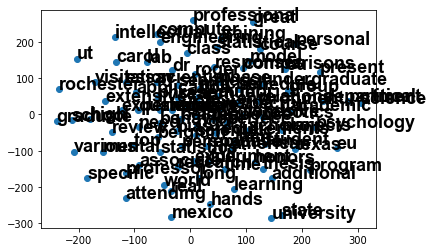

In [42]:
path = 'fonts/Arial Bold.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]),fontProperties =fontprop)

plt.draw()

In [47]:
import numpy as np

def find_analogies(w1, w2, w3, emb, word2idx):
    pos_word1 = emb[word2idx[w1]]
    pos_word2 = emb[word2idx[w2]]
    neg_word1 = emb[word2idx[w3]]
    v0 = pos_word1 + pos_word2 - neg_word1

    def dist1(a, b):
        return np.linalg.norm(a - b)
    def dist2(a, b):
        return 1 - a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

    for dist, name in [(dist1, 'Euclidean'), (dist2, 'cosine')]:
        min_dist = float('inf')
        best_word = ''
        for word, idx in iteritems(word2idx):
            if word not in (w1, w2, w3):
                v1 = emb[idx]
                d = dist(v0, v1)
                if d < min_dist:
                    min_dist = d
                    best_word = word
        print("closest match by", name, "distance:", best_word)
        print(w1, "-", w2, "=", w3, "-", best_word)

In [48]:
analogies_to_try = (
    ('student', 'school','program' ),
)

word2idx = {word: ii for ii, word in enumerate(tfidf.get_feature_names())}
word2idx

for word_list in analogies_to_try:
    print(word_list)
    w1, w2, w3 = word_list
    find_analogies(w1=w1, w2=w2, w3=w3, emb=Z, word2idx=word2idx)

('student', 'school', 'program')
closest match by Euclidean distance: rochester
student - school = program - rochester
closest match by cosine distance: studies
student - school = program - studies


--------------------------------------

In [9]:
with open('essay/collegeEssay01.txt', 'r') as jane_austin:
    novel = jane_austin.read()
print(novel[:100])

State University and I possess a common vision. I, like State University, constantly work to explore


In [10]:
## 문자열 --> 토큰 추출
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
### 워드 토큰
word_tokens = word_tokenize(novel)
### 정규표현식 토큰
token_pattern = r"\w+"
regex_tokens = regexp_tokenize(novel, token_pattern)
print(u"유일무이한 토큰 갯수: ", len(set(word_tokens)),  "단어 토큰: ", len(word_tokens))

유일무이한 토큰 갯수:  935 단어 토큰:  2791


In [11]:
## 토큰 전처리
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) 
# 알파벳만 추출
alpha_regex_tokens = [t for t in regex_tokens if t.isalpha()]
# 불용어 정리
alpha_regex_no_stops_tokens = [t for t in alpha_regex_tokens if t not in stop_words]
# WordNetLemmatizer 생성자
wordnet_lemmatizer = WordNetLemmatizer()
# Lemmatize all tokens into a new list: lemmatized
alpha_regex_no_stops_lemmatized_tokens = [wordnet_lemmatizer.lemmatize(t) for t in alpha_regex_no_stops_tokens]
print(alpha_regex_no_stops_lemmatized_tokens[:10])

['State', 'University', 'I', 'posse', 'common', 'vision', 'I', 'like', 'State', 'University']


In [12]:
from collections import Counter
novel_bow = Counter(alpha_regex_no_stops_lemmatized_tokens)
# 최빈값 10개 단어 추출
print(novel_bow.most_common(10))

[('I', 89), ('University', 24), ('science', 18), ('State', 15), ('would', 14), ('research', 12), ('time', 11), ('school', 11), ('This', 10), ('course', 10)]


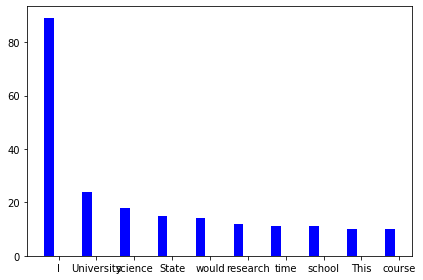

In [13]:
import matplotlib.pyplot as plt
import numpy as np
## 상위 10개 단어 추출
top10_novel_bow = novel_bow.most_common(10)
## 10개 단어 시각화를 위한 기반 작업
n_groups = len(top10_novel_bow)
index = np.arange(n_groups)
## 단어빈도수와 단어 리스트 자료형 준비
bow_vals = [x[1] for x in top10_novel_bow]
bow_words = [x[0] for x in top10_novel_bow]
## 막대그래프 시각화
bar_width = 0.25
plt.bar(index, bow_vals, bar_width, color='b', label='Ocurrences')
plt.xticks(index + bar_width, bow_words)
plt.tight_layout()
plt.show()

In [47]:
import nltk
read_data='essay/collegeEssay01.txt'
with open(read_data) as files:
    contents = files.read()
sentence_count = len(nltk.tokenize.sent_tokenize(contents))

as_one = ''
for document in contents:
    as_one = as_one + ' ' + document
words = as_one.split()

In [15]:
from nltk.corpus import brown
from nltk import sent_tokenize, word_tokenize
corpus = " ".join(brown.words())
[i for i in sent_tokenize(corpus) if u"could" in word_tokenize(i)]

["Opponents generally argued that the ballot couldn't give enough information about tax proposals for the voters to make an intelligent choice .",
 'The bill would increase from $5,000,000 to $15,000,000 the maximum loan the state could make to a local water project .',
 'Cotten construed this as a veiled effort by Parkhouse to help Dallas and other large cities get money which Cotten felt could better be spent providing water for rural Texas .',
 "A patient could receive up to 300 days paid-for nursing home care under a `` unit formula '' allowing more of such care for those who use none or only part of the hospital-care credit .",
 'The schools could use the money to pay 4-year scholarships , based on need , of up to $2,000 a year per student .',
 'If the administration ever had any ideas that it could find an acceptable alternative to Prince Souvanna Phouma , whom it felt was too trusting of Communists , it gradually had to relinquish them .',
 'He expressed the opinion the city cou

In [16]:
sentences = sent_tokenize(corpus)
[" ".join([sentences[i-1], j, sentences[i+1]]) for i,j in enumerate(sentences) if u"could" in word_tokenize(j)]

["The proposal would have to receive final legislative approval , by two-thirds majorities , before March 1 to be printed on the April 4 ballot , Roberts said . Opponents generally argued that the ballot couldn't give enough information about tax proposals for the voters to make an intelligent choice . All Dallas members voted with Roberts , except Rep. Bill Jones , who was absent .",
 'Most of the fire was directed by Cotten against Dallas and Sen. Parkhouse . The bill would increase from $5,000,000 to $15,000,000 the maximum loan the state could make to a local water project . Cotten construed this as a veiled effort by Parkhouse to help Dallas and other large cities get money which Cotten felt could better be spent providing water for rural Texas .',
 "The bill would increase from $5,000,000 to $15,000,000 the maximum loan the state could make to a local water project . Cotten construed this as a veiled effort by Parkhouse to help Dallas and other large cities get money which Cotten